In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

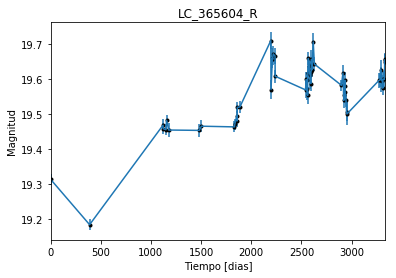

In [3]:
data = np.genfromtxt('LC_365604_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_365604_R')
plt.savefig("LC_365604_R.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

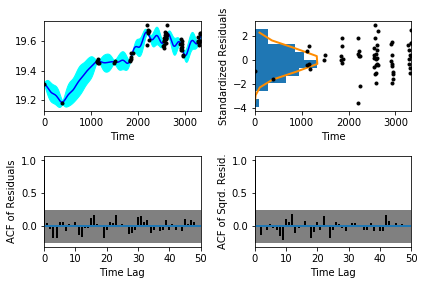

In [6]:
sample.assess_fit()

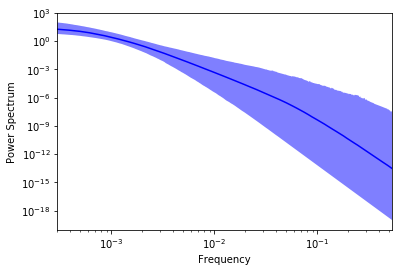

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

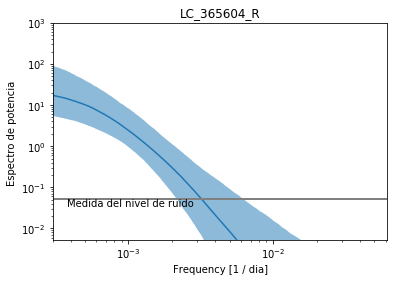

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_365604_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_365604_R')

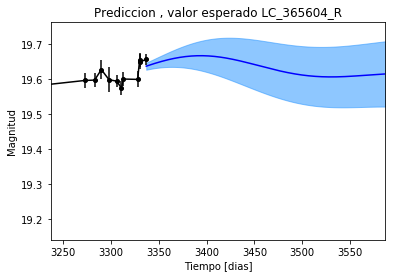

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_365604_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_365604_R')

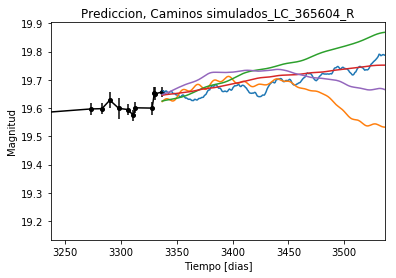

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_365604_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


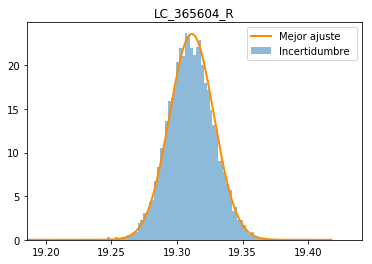

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_365604_R')
plt.savefig("Mejor_ajuste_LC_365604_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_365604_R')

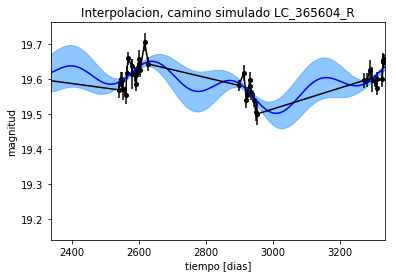

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_365604_R')

Text(0.5,1,'Interpolacion, camino simulado LC_365604_R')

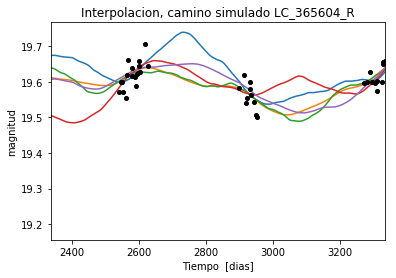

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_365604_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 598.367527364
Median: 0.0184958864461
Standard deviation: 0.232340811855
68% credibility interval: [ 0.00100068  0.30780983]
95% credibility interval: [  3.61905775e-04   8.83908746e-01]
99% credibility interval: [  3.14180854e-04   1.02690797e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 944.882256036
Median: 0.00083396861481
Standard deviation: 0.0531203453257
68% credibility interval: [ 0.00038247  0.00809989]
95% credibility interval: [ 0.00031089  0.12064178]
99% credibility interval: [  3.01660069e-04   4.14086469e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 551.857738657
Median: 0.0171969575553
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 4212.85736657
Median: 137.917820127
Standard deviation: 1.54720611234
68% credibility interval: [ 136.13934719  139.00557601]
95% credibility interval: [ 133.73677177  139.55172926]
99% credibility interval: [ 131.66013915  139.74986562]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 783.02392465
Median: 0.825946251618
Standard deviation: 2.13179165695
68% credibility interval: [ 0.06327112  4.02029599]
95% credibility interval: [ 0.01349196  7.07975604]
99% credibility interval: [ 0.00979097  9.72745925]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 447.38446791
Median: 0.214623666924
Standard deviation: 7.11253493276
68% credibility interval: [ 0.00929305  3.7271778 ]
95% credibility interval: [  5.45062050e-04 

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310432
Median: 9.50421425762e-45
Standard deviation: 5.8210825351e+98
68% credibility interval: [  6.19565453e-84   1.08112531e-11]
95% credibility interval: [  1.95508468e-146   3.11627449e+000]
99% credibility interval: [  1.41230796e-151   1.22742194e+038]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2779.42264537
Median: 19.486858185
Standard deviation: 0.102826822373
68% credibility interval: [ 19.40337502  19.5717765 ]
95% credibility interval: [ 19.29271243  19.71150996]
99% credibility interval: [ 19.14422147  19.83038598]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 411.415930067
Median: 0.0
Standard deviation: 0.202202985041
68% credibility interval: [ 0.          0.14307371]
95% credibility interval: [ 0.          0.83019913]
99% credibility interval: [ 0.       0.99933]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 411.415930067
Median: 0.0
Standard deviation: 0.202202985041
68% credibility interval: [ 0.          0.14307371]
95% credibility interval: [ 0.          0.83019913]
99% credibility interval: [ 0.       0.99933]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 790.114309649
Median: 0.0
Standard deviation: 0.000168202900934
68% credibility interval: [ 0.  0.]
95% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 4212.85736657
Median: 137.917820127
Standard deviation: 1.54720611234
68% credibility interval: [ 136.13934719  139.00557601]
95% credibility interval: [ 133.73677177  139.55172926]
99% credibility interval: [ 131.66013915  139.74986562]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3153.9229953
Median: 0.0285461503138
Standard deviation: 0.0349907277292
68% credibility interval: [ 0.01608669  0.05852146]
95% credibility interval: [ 0.01033013  0.12966884]
99% credibility interval: [ 0.00816248  0.2210431 ]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 4491.03033679
Median: 1.32333456353
Standard deviation: 0.202346557577
68% credibility interval: [ 1.1390606   1.53785168]
95% credibility interval: [ 0.98024162  1.78267927]
99% credibility interval: [ 0.87646277  1.91178221]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1143.40255314
Median: 2.26555215732e-05
Standard deviation: 0.0274335746615
68% credibility interval: [  6.96967738e-07   6.53242571e-04]
95% credibility interval: [  2.32362818e-08   9.43357504e-03]
99% credibility interval: [  8.77887490e-45   1.26869970e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 598.367527364
Median: (-0.116213081962-0.94985371551j)
Standard deviation: 1.93526493415
68% credibility interval: [-1.93402622+0.j         -0.00628748-0.03949421j]
95% credibility interval: [ -5.55376245e+00+0.j         -2.27392105e-03-0.0043883j]
99% credibility interval: [ -6.45225307e+00+0.j          -1.97405653e-03-0.00167939j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 944.882256036
Median: (-0.00523997934722+0j)
Standard deviation: 1.313588787
68% credibility interval: [-0.05089313+1.65688154j -0.00240312+0.j        ]
95% credibility interval: [-0.75801467+0.29545536j -0.00195341+0.j        ]
99% credibility interval: [ -2.60178202e+00+1.20501407j  -1.89538611e-03+0.j        ]
Posterior summary for paramete